In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from decision_tree import Tree
from datasets import *
from fitness import *
from ls import ls_first_improvement
from visual_utils import *
from perturbs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


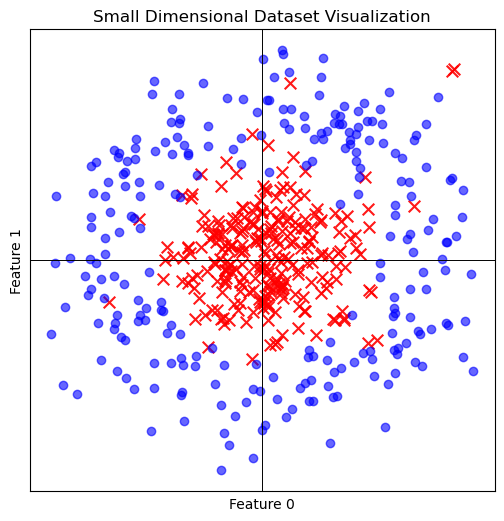

In [2]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])
fitness_fn_1 = lambda tree: fitness(tree, dataset_dict)

In [20]:
perturbation = lambda tree: randomly_grow(
    tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.1
)
# lambda tree: randomly_grow(
#     tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.1
# )

# lambda tree: combined_perturb(
#     tree, feature_bounds=dataset_dict["feature_bounds"], prob_change=0.1, prob_add=0.1
# )

fitness_fn = fitness_fn_1

init_fn = "clever"
# "basic"
# "coinflip"
# "clever"

# init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
max_evals = 10_000
trials = 10

fitness_list = []

for trial in range(trials):

    results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=500,
        feature_bounds=dataset_dict["feature_bounds"],
    )

    fitness_list.append(results["best_fitness"])


fitness_list = np.array(fitness_list)


print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)

KeyboardInterrupt: 

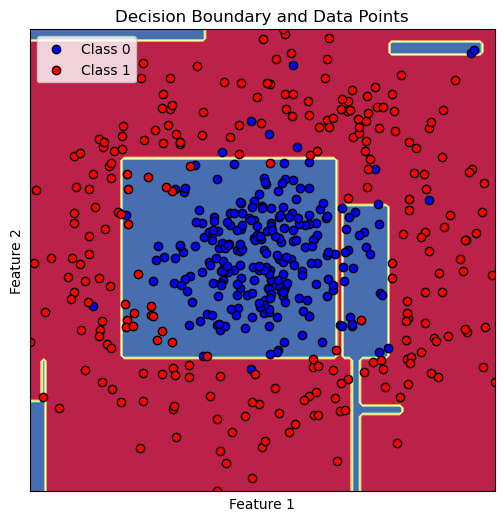

best fitness:  0.938


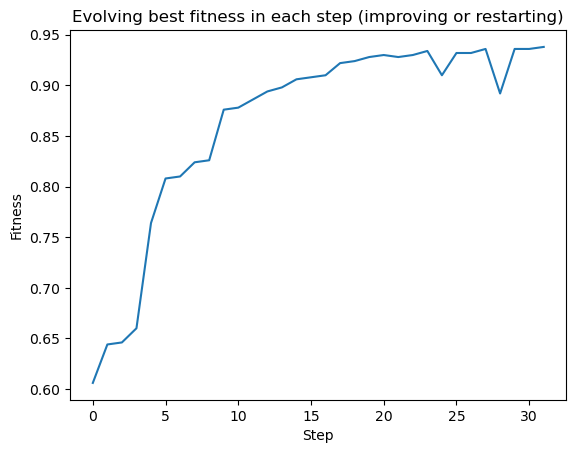

671


In [22]:
perturbation = lambda tree: randomly_grow(
    tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.1
)
results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=1000,
        feature_bounds=dataset_dict["feature_bounds"],
    )

best_tree = results["best_tree"]
visualise_tree_decision(best_tree, dataset_dict)
best = results["best_fitness"]
print("best fitness: ",best)
# best_tree.print_tree_traverse()

history = results["history"]
evolving_fitnesses = [iteration["fitness"] for iteration in history]
simple_graph(
    evolving_fitnesses,
    "Step",
    "Fitness",
    f"Evolving best fitness in each step (improving or restarting)",
)

print(best_tree.size())

In [ ]:
trials = 10

perturbation = lambda tree: randomly_grow(
    tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.01
)

sizes = []
fitnesses = []
for i in range(trials):
    results = ls_first_improvement(
            fitness_fn=fitness_fn,
            perturbation_fn=perturbation,
            initialisation_fn=init_fn,
            stop_cond=max_evals,
            one_step_max=1000,
            feature_bounds=dataset_dict["feature_bounds"],
        )

    best_tree = results["best_tree"]
    sizes.append(best_tree.size())
    fitnesses.append(results["best_fitness"])

print("tree sizes")
print(np.mean(sizes), np.std(sizes))
print(sizes)
print("fitnesses")
print(np.mean(fitnesses), np.std(fitnesses))
print(fitnesses)

plt.scatter(sizes, fitnesses)
plt.xlabel('Tree Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Tree Size')
plt.show()

KeyboardInterrupt: 